# Meteogram for Konza Prairie Biological Station 


**Student Name**: Bhaskar Aryal



**Challenge**: Create a meteogram for a weather station located within the Konza Prairie Biological Station. You need to create a meteogram of only the month of January 2022.

**Dataset description**: The name of the dataset is `konza_weather.xlsx` The dataset contains multiple weather variables recorded at hourly resolution at the Konza Prairie. Missing data in this particular dataset is represented with `-9999`. Note that dataset may contain more columns that what you need to plot. The dataset is an MS Excel workbook that contains two sheets, the data that you need for this exam is in the first sheet. You don't need to read the second sheet with metadata. In addition the first sheet contains a line at the very top with the datalogger serial number (you will need to skip this line) and a third line with units (you will also need to skip this line). Use the Pandas documentation to help you with the options available in `pd.read_excel()` to handle all of this.

A meteogram is a graphical representation of weather variables for a specific period of time and for a given location. Here is an example from the National Weather Service [link](https://forecast.weather.gov/MapClick.php?lat=39.1901&lon=-96.59&unit=0&lg=english&FcstType=graphical)


## Plotting libraries

You can use Matplotlib or Bokeh libraries, but you can only use one of them.


## Outputs

In addition to the Jupyter notebook, your code must save the resulting meteogram in `.svg` format. The `.svg` format stands for Scalable Vector Graphics, allows resizing of images without loss of resolution (without pixelation)


## Things that are not allowed

You cannot edit the Excel file by hand.

Code outside the scope of the class from online tutorials. Make sure you understand the code that you write.


In [1]:
# Improt necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt

In [2]:
# Locate the current working Directory 
#os.getcwd()

In [3]:
# Check if the excel fiel we want to read in located in the directory 
#'konza_weather.xlsx' in os.listdir()

In [4]:
# Read the excel data file 
konza_raw = pd.read_excel('konza_weather.xlsx', skiprows = [0, 2], sheet_name = 0) # specify the sheet you want to load
# Display the first five rows of the data
konza_raw.head()

,Timestamp,Soil Moisture 5 cm,Soil Temperature 5 cm,Soil Moisture 20 cm,Soil Temperature 20 cm,Soil Moisture 40 cm,Soil Temperature 40 cm,Solar Radiation,Precipitation,Wind Direction,Wind Speed,Wind Gust Speed,Air Temperature,Vapor Pressure,Atmospheric Pressure,Relative Humidity,Vapor Pressure Deficit
0,2021-06-29 19:00:00,0.201,26.7,0.191,25.8,0.307,25.2,598.9,0.0,141,2.30,5.00,25.6,2.663,97.72,27.7,0.63
1,2021-06-29 20:00:00,0.202,27.5,0.191,25.9,0.307,25.1,575.2,0.0,146,2.62,5.14,26.5,2.572,97.68,28.8,0.89
2,2021-06-29 21:00:00,0.202,28.1,0.191,26.0,0.307,25.1,512.1,0.0,156,2.93,6.50,26.7,2.552,97.67,28.8,0.94
3,2021-06-29 22:00:00,0.202,28.5,0.191,26.2,0.307,25.1,317.6,0.0,167,2.28,4.29,26.3,2.519,97.65,28.0,0.90
4,2021-06-29 23:00:00,0.202,28.7,0.191,26.4,0.307,25.0,406.4,0.0,166,2.37,4.44,26.7,2.619,97.63,28.5,0.89


In [5]:
# Convert timestamps to datetime format 
# Check the data type for konza variables  
konza_raw.dtypes

Timestamp                 datetime64[ns]
Soil Moisture 5 cm               float64
Soil Temperature 5 cm            float64
Soil Moisture 20 cm              float64
Soil Temperature 20 cm           float64
Soil Moisture 40 cm              float64
Soil Temperature 40 cm           float64
Solar Radiation                  float64
Precipitation                    float64
Wind Direction                     int64
Wind Speed                       float64
Wind Gust Speed                  float64
Air Temperature                  float64
Vapor Pressure                   float64
Atmospheric Pressure             float64
Relative Humidity                float64
Vapor Pressure Deficit           float64
dtype: object

In [6]:
# Check type of timestamp column values
type(konza_raw['Timestamp'][0])

# The timestamp is already in the ISO 8601 date and time format 

# Inactive code for converting into Pandas datetime format: 
# --> konza['Timestamp'] = pd.to_datetime(konza['Timestamp'], format='%d/%m/%Y')


pandas._libs.tslibs.timestamps.Timestamp

In [7]:
# select data for July 2022 

# Slicing specific rows for July 2022 data 
month_start = "2022-07-01 00:00:00"
month_end = "2022-07-31 23:00:00"

# Obtain indices of these dates as aggument to .iloc() function 

month_start_index = konza_raw.index[konza_raw['Timestamp'] == month_start][0] # The [0] is to retain the first element of the resulting Int64Index element necessary of .iloc()
month_end_index = konza_raw.index[konza_raw['Timestamp'] == month_end][0]

# slicing the data for the month

konza_July2022 = konza_raw.iloc[month_start_index: month_end_index + 1] # we add 1 in the month_end_index so that the data of July 31 is also captured 

In [8]:
# Check the start date of the sliced data
konza_July2022.head(1)

,Timestamp,Soil Moisture 5 cm,Soil Temperature 5 cm,Soil Moisture 20 cm,Soil Temperature 20 cm,Soil Moisture 40 cm,Soil Temperature 40 cm,Solar Radiation,Precipitation,Wind Direction,Wind Speed,Wind Gust Speed,Air Temperature,Vapor Pressure,Atmospheric Pressure,Relative Humidity,Vapor Pressure Deficit
8787,2022-07-01,0.248,28.3,0.288,25.0,0.354,23.1,343.3,0.0,169,3.88,7.84,31.7,2.645,96.86,33.3,2.03


In [9]:
# Check the start date of the sliced data
konza_July2022.tail(1)

,Timestamp,Soil Moisture 5 cm,Soil Temperature 5 cm,Soil Moisture 20 cm,Soil Temperature 20 cm,Soil Moisture 40 cm,Soil Temperature 40 cm,Solar Radiation,Precipitation,Wind Direction,Wind Speed,Wind Gust Speed,Air Temperature,Vapor Pressure,Atmospheric Pressure,Relative Humidity,Vapor Pressure Deficit
9530,2022-07-31 23:00:00,0.291,28.3,0.311,25.2,0.259,24.1,449.6,0.0,186,1.33,3.49,33.0,3.473,97.13,35.5,1.54


## Replace missing values

- Missing data in this particular dataset is represented with `-9999`

- Replace hours with missing precipitation with a constant value of zero.

- Replace hours with missing observations for all other the variables using a piecewise cubic Hermite polynomial. Ensure that no interpolation occurs when there are 3 or more consecutive missing values (exclduing precipitation). In situations where the span of consecutive missing values is longer than three or more hours then leave the `NaN` values in the record. 
**Hint**: Check the options in the `.interpolate()` method in the Pandas documentation to solve this part.


In [10]:
# Replacing missing values 

# Check the dimension of the data
konza_July2022.shape

# Identify cells with missing values (-999 representation in our case) in entire dataframe
index_missing = konza_July2022.isin([-9999])
index_missing

,Timestamp,Soil Moisture 5 cm,Soil Temperature 5 cm,Soil Moisture 20 cm,Soil Temperature 20 cm,Soil Moisture 40 cm,Soil Temperature 40 cm,Solar Radiation,Precipitation,Wind Direction,Wind Speed,Wind Gust Speed,Air Temperature,Vapor Pressure,Atmospheric Pressure,Relative Humidity,Vapor Pressure Deficit
8787,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8788,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8789,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Replace all missing values with NaN
konza = konza_July2022.copy() # Created a copy of the dataframe to replace the missing values so that we don't mess up the original dataset
konza[index_missing] = np.nan
konza = konza.reset_index()
konza.head()

,index,Timestamp,Soil Moisture 5 cm,Soil Temperature 5 cm,Soil Moisture 20 cm,Soil Temperature 20 cm,Soil Moisture 40 cm,Soil Temperature 40 cm,Solar Radiation,Precipitation,Wind Direction,Wind Speed,Wind Gust Speed,Air Temperature,Vapor Pressure,Atmospheric Pressure,Relative Humidity,Vapor Pressure Deficit
0,8787,2022-07-01 00:00:00,0.248,28.3,0.288,25.0,0.354,23.1,343.3,0.0,169.0,3.88,7.84,31.7,2.645,96.86,33.3,2.03
1,8788,2022-07-01 01:00:00,0.247,28.2,0.287,25.2,0.353,23.1,99.7,0.0,167.0,3.37,7.10,30.4,2.470,96.85,31.3,1.88
2,8789,2022-07-01 02:00:00,0.246,27.8,0.287,25.4,0.353,23.2,20.8,0.0,153.0,2.74,5.96,28.5,2.441,96.86,28.5,1.46
3,8790,2022-07-01 03:00:00,0.246,27.4,0.287,25.5,0.353,23.2,0.0,0.0,165.0,3.16,7.12,28.2,2.266,96.87,27.8,1.56
4,8791,2022-07-01 04:00:00,0.246,26.9,0.287,25.5,0.354,23.2,0.0,0.0,158.0,1.70,4.15,26.6,2.252,96.97,26.4,1.22


In [12]:
# Display Initial Number of missing values in each 
konza.isna().sum()

index                      0
Timestamp                  0
Soil Moisture 5 cm         0
Soil Temperature 5 cm      0
Soil Moisture 20 cm        0
Soil Temperature 20 cm     0
Soil Moisture 40 cm        0
Soil Temperature 40 cm     0
Solar Radiation            5
Precipitation              4
Wind Direction            28
Wind Speed                28
Wind Gust Speed           28
Air Temperature            0
Vapor Pressure             0
Atmospheric Pressure       0
Relative Humidity          0
Vapor Pressure Deficit    52
dtype: int64

In [13]:
# Replace the missing values in Precipitation Column 
konza['Precipitation'].fillna(0, inplace = True)
# Check if missing values exist in the precipitation column 
konza['Precipitation'].isna().sum()

0

In [14]:
# piecewise cubic Hermite Polynomial 
for col in konza.columns:
    if konza[col].isna().sum() != 0: 
        konza[col].interpolate(method = 'pchip', limit = 2, inplace = True)        

In [15]:
# Display the number of missing values for each column. Note that not all columns contain missing values.
konza.isna().sum()

index                      0
Timestamp                  0
Soil Moisture 5 cm         0
Soil Temperature 5 cm      0
Soil Moisture 20 cm        0
Soil Temperature 20 cm     0
Soil Moisture 40 cm        0
Soil Temperature 40 cm     0
Solar Radiation            2
Precipitation              0
Wind Direction            24
Wind Speed                24
Wind Gust Speed           24
Air Temperature            0
Vapor Pressure             0
Atmospheric Pressure       0
Relative Humidity          0
Vapor Pressure Deficit    27
dtype: int64

## Find specific weather events

Use the cells below to place your code for each weather event

In [16]:
# Find and print total precipitation in millimeters
# Answer format: "Total precipitation in July was X mm"

Total_Precipitation = sum(konza['Precipitation'])
print(f"Total precipitation in July was", round(Total_Precipitation, 3), "mm")

Total precipitation in July was 48.802 mm


In [17]:
# Find the total number of hours with measurable precipitation (this is precipitation greater than zero mm)
# Answer format: "July had a total of 107 hours with precipitation"

# Remember the timestamp takes data each hour 
print(f"July had a total of", (konza['Precipitation']>0).sum(), "hours with Precipitation")

July had a total of 107 hours with Precipitation


In [18]:
# Find median air temperature. 
# Answer format: "Median air temperature for July was X Celsius."
print(f"Median air temperature for July was", konza['Air Temperature'].median(), "Celsius.")

Median air temperature for July was 25.35 Celsius.


In [19]:
# Find value and time of minimum air temperature. 
# Answer format: "Lowest air temperature was X Celsius on Saturday, July 23, 2022 06:00" (use the date that you found)

# Find the Minimum Air Temperature
min_air_temperature = konza['Air Temperature'].min()

# Find Index of the minimum air temperature obsevation 
min_air_temperature_index = konza['Air Temperature'].argmin() # remember argmin() is numpy method and returns index of the min value

#Retain the date for this index 
min_air_temperature_time = konza.loc[min_air_temperature_index, 'Timestamp']
 
# Print the answer # Add the strftime format to change it to a string with Day included 
print("Lowest air temperature was", min_air_temperature, "Celsius on", min_air_temperature_time.strftime('%A, %B %d, %Y %H:%M:%S'))

Lowest air temperature was 13.3 Celsius on Saturday, July 30, 2022 12:00:00


In [20]:
# Find value and time of maximum air temperature.
# Answer format: "Highest air temperature was X Celsius on Saturday, July 23, 2022 14:00" (use the date that you found)

# Find the Maximum Air Temperature
max_air_temperature = konza['Air Temperature'].max()

# Find Index of the maximum air temperature obsevation 
max_air_temperature_index = konza['Air Temperature'].argmax() # remember argmax() is numpy method and returns index of the max value

#Retain the date for this index 
max_air_temperature_time = konza.loc[max_air_temperature_index, 'Timestamp']
 
# Print the answer # Add the strftime format to change it to a string with Day included 
print("Highest air temperature was", max_air_temperature, "Celsius on", max_air_temperature_time.strftime('%A, %B %d, %Y %H:%M:%S'))


Highest air temperature was 37.4 Celsius on Saturday, July 23, 2022 22:00:00


In [21]:
# Find maximum wind gust and time of occurrence.
# Note that wind speed (mean of the hour) and wind gust speed (max of the hour) are separate columns.
# Answer format: "Maximum wind gust was X m/s on Friday, July 22, 2022 11:00" (use the date that you found)

# Find the wind gust speed
max_windgust = konza['Wind Gust Speed'].max()

# Find Index of the maximum air temperature obsevation 
max_windgust_index = konza['Wind Gust Speed'].argmax() # remember argmax() is numpy method and returns index of the max value

#Retain the date for this index 
max_windgust_time = konza.loc[max_windgust_index, 'Timestamp']
 
# Print the answer # Add the strftime format to change it to a string with Day included 
print("Maximum wind gust was", max_windgust, "m/s on", max_windgust_time.strftime('%A, %B %d, %Y %H:%M:%S'))

Maximum wind gust was 11.4 m/s on Saturday, July 23, 2022 20:00:00


## Meteogram variables

The meteogram must contain the following subplots:

- subplot 1: Air temperature and relative humidity (both in the same plot)
- subplot 2: Atmospheric pressure 
- subplot 3: Vapor pressure deficit
- subplot 4: Wind speed and wind gust
- subplot 5: Solar radiation
- subplot 6: Precipitation (use either a bar chart or a step chart). Add a text annotation showing the total
- subplot 7: Soil temperature for 5, 20, and 40 cm depths (all three variables in the same subplot)
- subplot 8: Soil moisture for 5, 20, and 40 cm depths (all three variables in the same subplot)


In the cell below place your code to generate the meteogram. Make sure to add reasonable limits to each axis. Use the provided example to guide you.


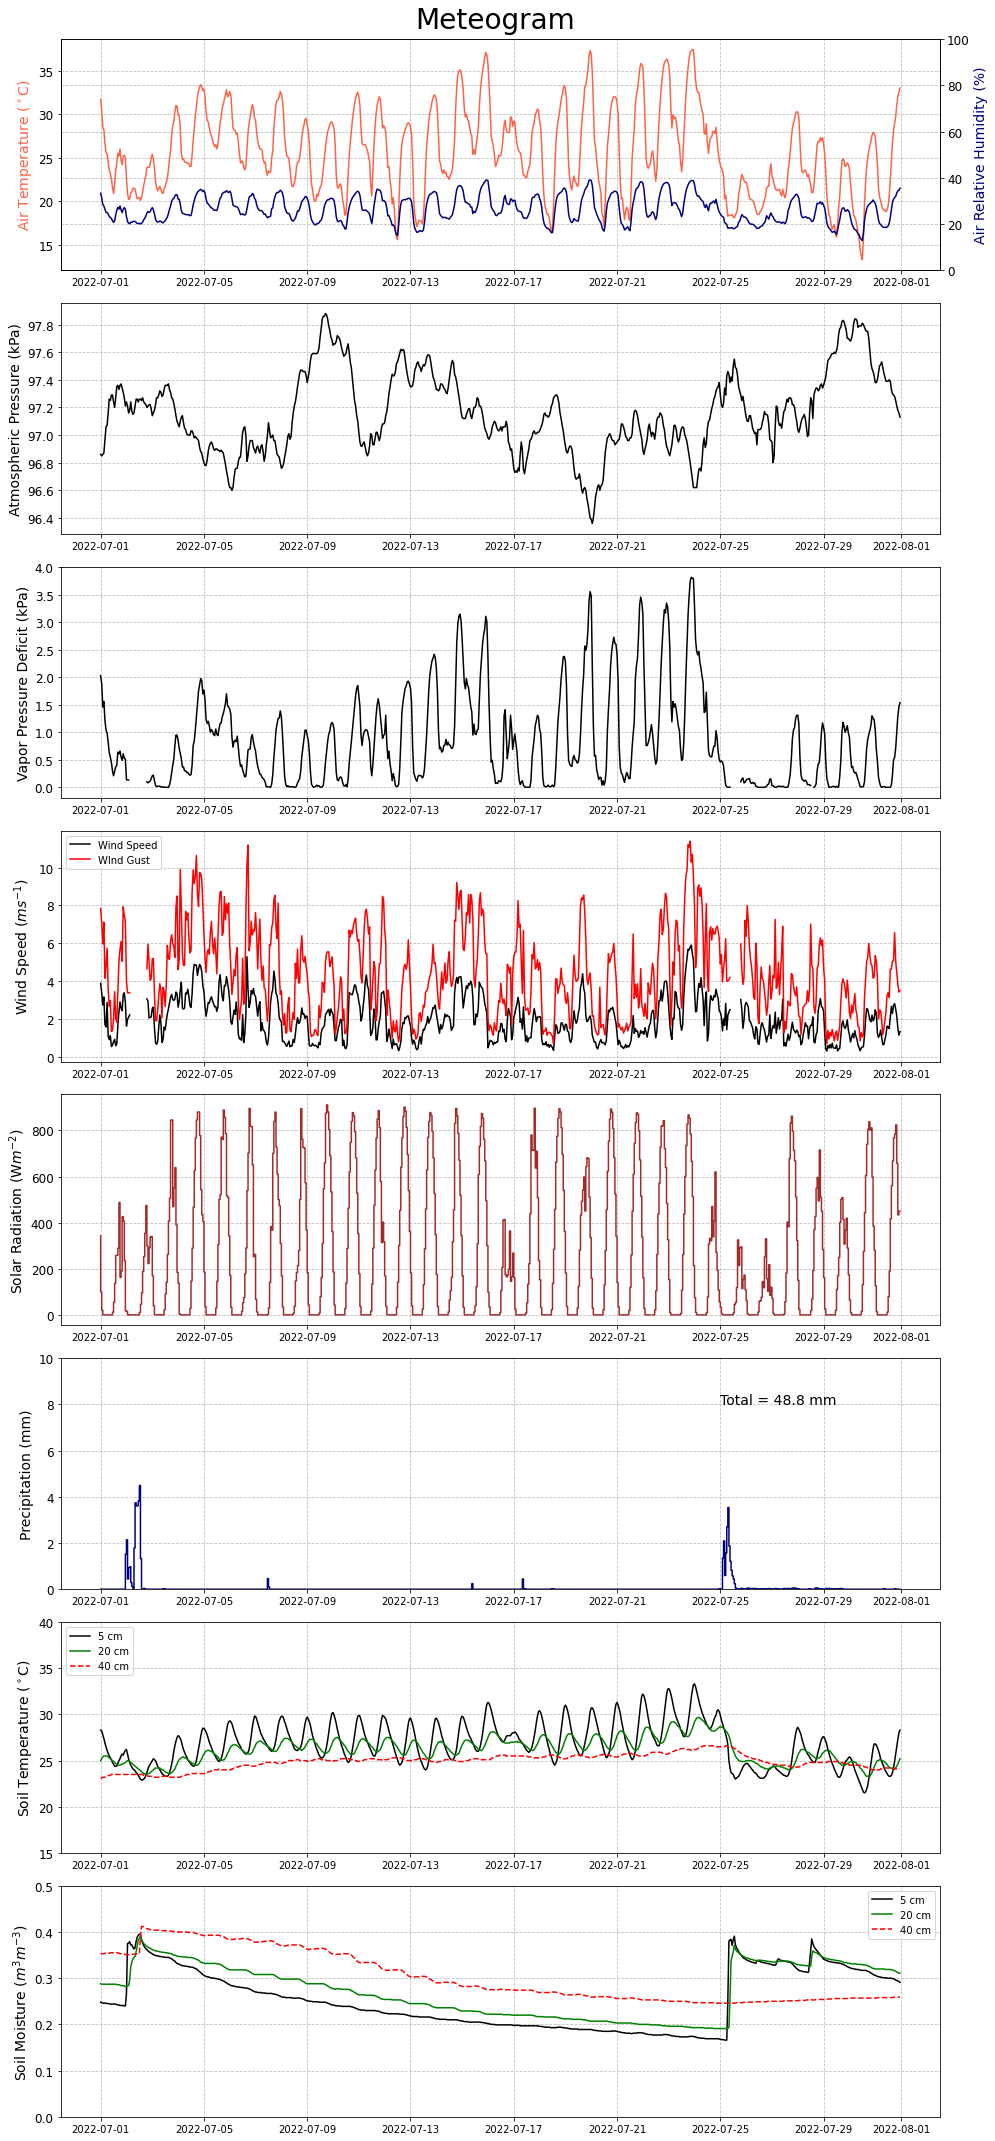

In [22]:
# Meteogram plot
# Add a line to save the resulting meteogram in .svg format
# The ggplot style background theme as provided in the solution is intentionally not used here 

# Set the figure size 
plt.figure(figsize = (14, 30))

# Title of the Plot 
plt.suptitle('Meteogram', fontsize=28, y = 0.99)

# Parameters 

font_size = 14
xticks_size = 10
yticks_size = 12

# subplot 1: Air temperature and relative humidity (both in the same plot)
plt.subplot(8, 1, 1)
plt.plot(konza['Timestamp'], konza['Air Temperature'], color = 'tomato')
plt.ylabel("Air Temperature ($^\circ$C)", color = 'tomato', size = font_size)
plt.yticks(size = yticks_size)
plt.xticks(size = xticks_size)
plt.grid(color = 'grey', linestyle = "--", alpha = 0.50)

# Secondary axis for Relative Humidity 
plt.twinx()
plt.plot(konza['Timestamp'], konza['Relative Humidity'], color = 'navy')
plt.ylabel("Air Relative Humidity (%)", color = 'navy', size = font_size)
plt.ylim(0, 100)
plt.xticks(size = xticks_size)
plt.yticks(size = yticks_size)
plt.grid(color = 'grey', linestyle = "--", alpha = 0.50)


# subplot 2: Atmospheric pressure
plt.subplot(8, 1, 2)
plt.plot(konza['Timestamp'], konza['Atmospheric Pressure'], color = 'black')
plt.ylabel("Atmospheric Pressure (kPa)", color = 'black', size = font_size)
plt.yticks(size = yticks_size)
plt.xticks(size = xticks_size)
plt.grid(color = 'grey', linestyle = "--", alpha = 0.50)

# subplot 3: Vapor pressure deficit
plt.subplot(8, 1, 3)
plt.plot(konza['Timestamp'], konza['Vapor Pressure Deficit'], color = 'black')
plt.ylabel("Vapor Pressure Deficit (kPa)", color = 'black', size = font_size)
plt.yticks(size = yticks_size)
plt.xticks(size = xticks_size)
plt.grid(color = 'grey', linestyle = "--", alpha = 0.50)

# subplot 4: Wind speed and wind gust
plt.subplot(8, 1, 4)
plt.plot(konza['Timestamp'], konza['Wind Speed'], color = 'black', label = 'Wind Speed')
plt.plot(konza['Timestamp'], konza['Wind Gust Speed'], color = 'red', label = 'WInd Gust')
plt.ylabel("Wind Speed ($m s^{-1}$)", color = 'black', size = font_size)
plt.yticks(size = yticks_size)
plt.xticks(size = xticks_size)
plt.grid(color = 'grey', linestyle = "--", alpha = 0.50)
plt.legend(loc = 'upper left')


# subplot 5: Solar radiation
plt.subplot(8, 1, 5)
plt.plot(konza['Timestamp'], konza['Solar Radiation'], color = 'brown', drawstyle = 'steps')
plt.ylabel("Solar Radiation (W$m^{-2}$)", color = 'black', size = font_size)
plt.yticks(size = yticks_size)
plt.xticks(size = xticks_size)
plt.grid(color = 'grey', linestyle = "--", alpha = 0.50)

# subplot 6: Precipitation (use either a bar chart or a step chart). Add a text annotation showing the total
plt.subplot(8, 1, 6)
plt.step(konza['Timestamp'], konza['Precipitation'], color = 'navy')
plt.ylabel("Precipitation (mm)", color = 'black', size = font_size)
plt.ylim(0, 10)
plt.text(dt.date(2022, 7, 25), 8, f"Total = {round(Total_Precipitation, 2)} mm", size = 14)
plt.yticks(size = yticks_size)
plt.xticks(size = xticks_size)
plt.grid(color = 'grey', linestyle = "--", alpha = 0.50)

# subplot 7: Soil temperature for 5, 20, and 40 cm depths (all three variables in the same subplot)
plt.subplot(8, 1, 7)
plt.plot(konza['Timestamp'], konza['Soil Temperature 5 cm'], color = 'black', label = '5 cm')
plt.plot(konza['Timestamp'], konza['Soil Temperature 20 cm'], color = 'green', label = '20 cm')
plt.plot(konza['Timestamp'], konza['Soil Temperature 40 cm'], color = 'red', label = '40 cm', linestyle = "--")
plt.ylabel("Soil Temperature ($^\circ$C)", color = 'black', size = font_size)
plt.ylim(15, 40)
plt.yticks(size = yticks_size)
plt.xticks(size = xticks_size)
plt.grid(color = 'grey', linestyle = "--", alpha = 0.50)
plt.legend(loc = 'upper left')

# subplot 8: Soil moisture for 5, 20, and 40 cm depths (all three variables in the same subplot)
plt.subplot(8, 1, 8)
plt.plot(konza['Timestamp'], konza['Soil Moisture 5 cm'], color = 'black', label = '5 cm')
plt.plot(konza['Timestamp'], konza['Soil Moisture 20 cm'], color = 'green', label = '20 cm')
plt.plot(konza['Timestamp'], konza['Soil Moisture 40 cm'], color = 'red', label = '40 cm', linestyle = "--")
plt.ylabel("Soil Moisture ($m^3m^{-3}$)", color = 'black', size = font_size)
plt.ylim(0, 0.5)
plt.yticks(size = yticks_size)
plt.xticks(size = xticks_size)
plt.grid(color = 'grey', linestyle = "--", alpha = 0.50)
plt.legend(loc = 'upper right')

# subplot adjustments 
# Use tight layout so that the plots do not overlap with each other, alternatively subplot_adjust() can also be usd 

plt.tight_layout()

# Save the plot in svg format 
plt.savefig("Bhaskar_MidTerm_Meteogram_tight.svg", dpi = 300)

plt.show()